# Using a configurable pipeline

**Setup**

Import the minimal set of functions you need. Note, there are module level loggers which can display lots of information useful for understanding/troubleshooting the workflows. For these examples, the image_analysis module logger silences info/debug logging.

In [19]:
from geecs_data_utils.scan_data import ScanData, ScanPaths
from image_analysis.offline_analyzers.beam_analyzer import BeamAnalyzer
from geecs_data_utils.config_roots import image_analysis_config

import logging

logging.getLogger("image_analysis").setLevel(logging.WARNING)

image_analysis_config.set_base_dir(ScanPaths.paths_config.image_analysis_configs_path)

Create a ScanData object for easy access to the data

In [20]:
sd = ScanData.from_date(year=2025, month=9, day=24, number=13, experiment="Thomson")

2025-10-06 15:51:57,921 - image_analysis.processing.background_manager - WARNING - Failed to load background from {scan_dir}/computed_background.npy: Background file not found: {scan_dir}/computed_background.npy. Using constant fallback: 100.0


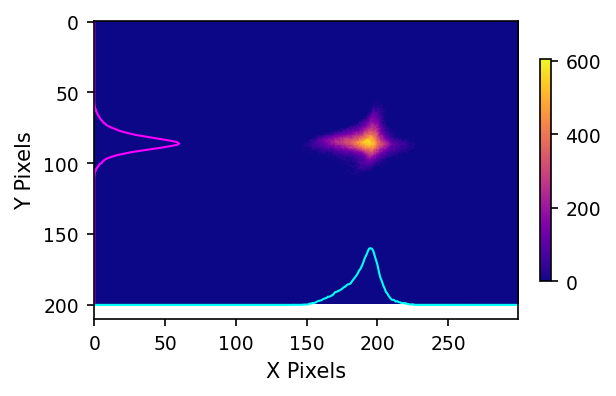

(<Figure size 600x400 with 2 Axes>,
 <Axes: xlabel='X Pixels', ylabel='Y Pixels'>)

In [21]:
dev_name = "HTT-C-ASSERTHighR"
analyzer = BeamAnalyzer(dev_name)
file_path = sd.data_frame[f"{dev_name}_expected_path"][10]
result = analyzer.analyze_image_file(file_path)
analyzer.visualize(result)

Define a different processing pipeline. To illustrate we make a basic piple that just does background and thresholding (no ROI)

2025-10-06 15:51:58,180 - image_analysis.processing.background_manager - WARNING - Failed to load background from {scan_dir}/computed_background.npy: Background file not found: {scan_dir}/computed_background.npy. Using constant fallback: 100.0


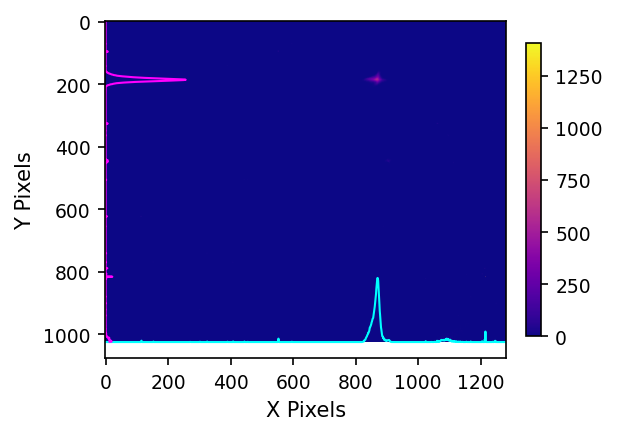

(<Figure size 600x480.094 with 2 Axes>,
 <Axes: xlabel='X Pixels', ylabel='Y Pixels'>)

In [22]:
from image_analysis.processing import config_models as cfg

new_pipeline = cfg.PipelineConfig()
new_pipeline.steps = [
    cfg.ProcessingStepType.BACKGROUND,
    cfg.ProcessingStepType.THRESHOLDING,
]

analyzer.update_config(pipeline=new_pipeline)
result = analyzer.analyze_image_file(file_path)
analyzer.visualize(result)